In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import classification_report
# Importiere alle nötigen Daten

dog_data = pd.read_csv('hunderassen_detailliert.csv') # lädt die Daten aus dem Dokument
dog_data = dog_data.dropna() # löscht alle Zeilen mit fehlenden Daten
dog_data = dog_data.drop(["Fellfarbe"], axis = 1) # Löscht Fellfarbe, da sie nicht numerisch ist
dog_data_test_train = dog_data.drop(["Max_Alter", "Schulterhöhe_cm", "Laufgeschwindigkeit_kmh"], axis = 1)# löscht Alter und 
# Geschwindigkeit, da sie nicht wirklich helfen und dazu führen könnten, dass der Algorithmus falsche Schlussfolgerungen zieht
# Schulterhöhe ist dasselbe wie größe, ist deshalb verwirrend

X = dog_data_test_train.drop(columns=['Rasse']) # filtert den Input/
y = dog_data_test_train['Rasse'] # filtert den Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 750) # teilt Imput und Output jeweils in 
# Trainings- und  Testdaten(20%Testdaten)
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train) # trainiert den Algorithmus

predictions = clf.predict(X_test)
result = accuracy_score(predictions, y_test) # führt den Test durch

print (result) # beschreibt die Treffsicherheit
print(classification_report(y_test, predictions)) # liefert weitere Einzelheiten

0.84
                       precision    recall  f1-score   support

               Beagle       0.85      1.00      0.92        17
               Dackel       1.00      1.00      1.00        12
Deutscher Schäferhund       0.75      1.00      0.86        12
     Golden Retriever       0.61      0.85      0.71        13
   Labrador Retriever       0.67      0.31      0.42        13
                Pudel       1.00      0.79      0.88        19
           Rottweiler       1.00      0.93      0.96        14

             accuracy                           0.84       100
            macro avg       0.84      0.84      0.82       100
         weighted avg       0.85      0.84      0.83       100



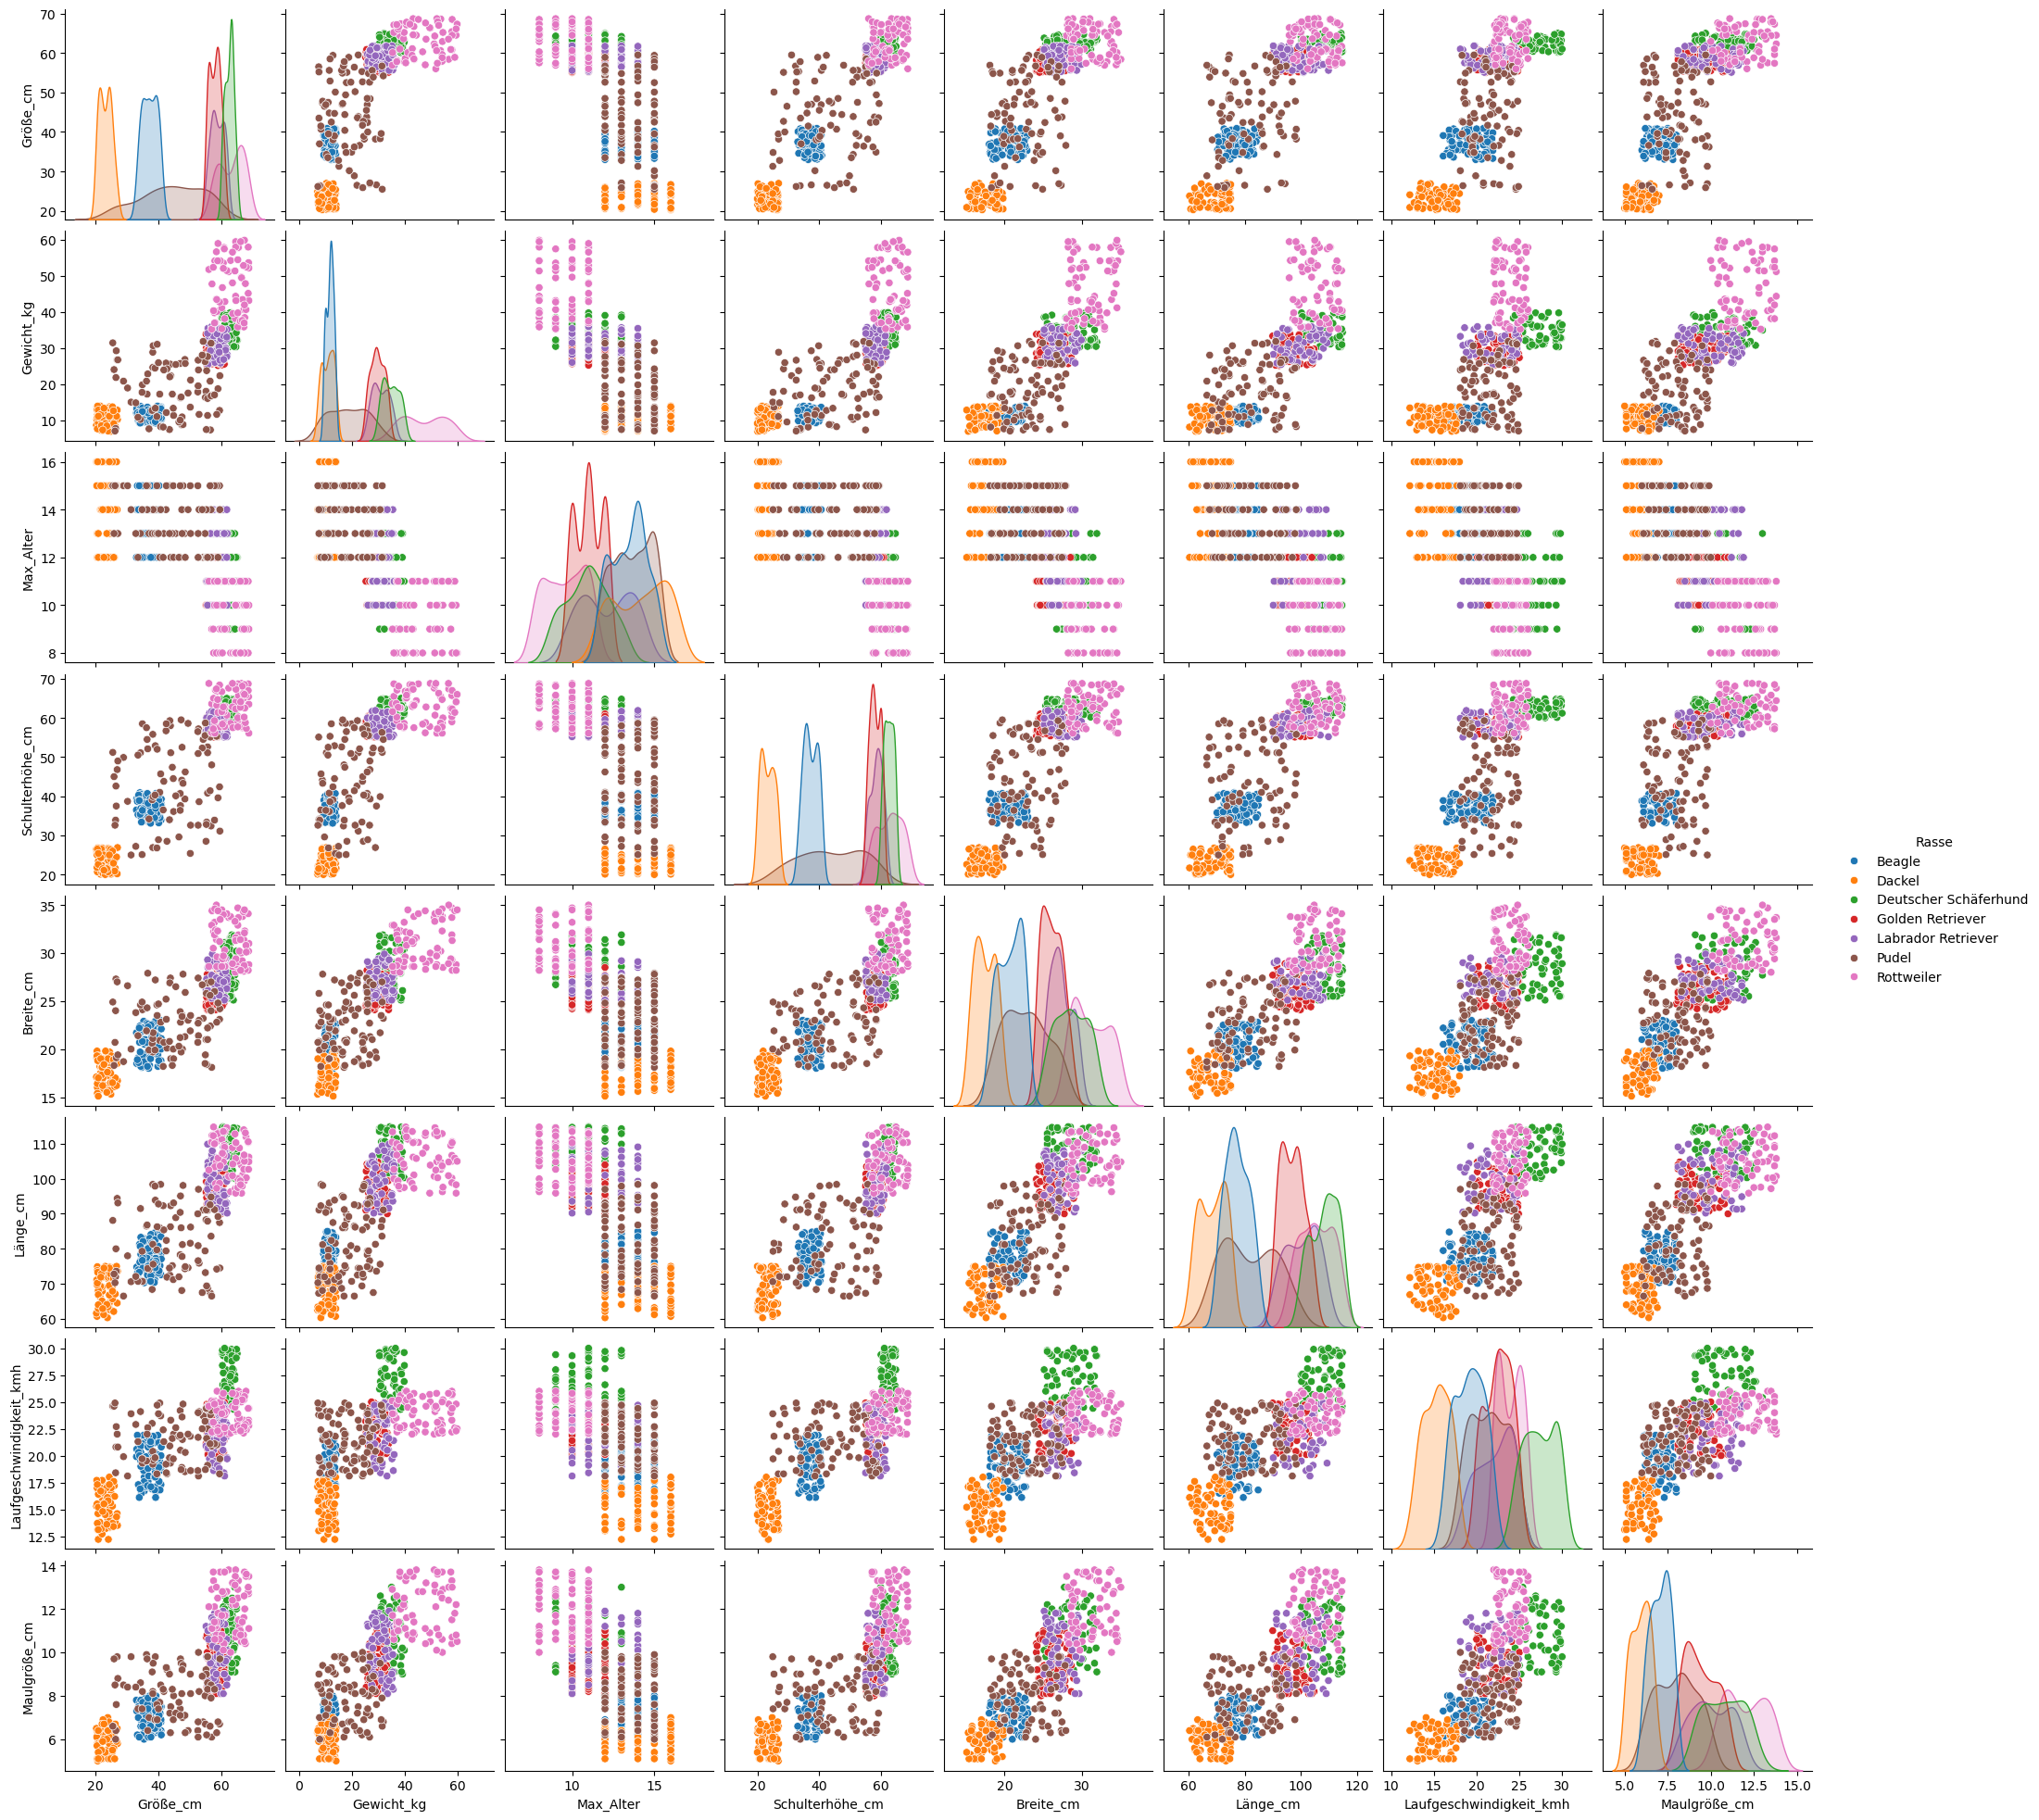

In [188]:
sns.pairplot(data = dog_data, hue = "Rasse")

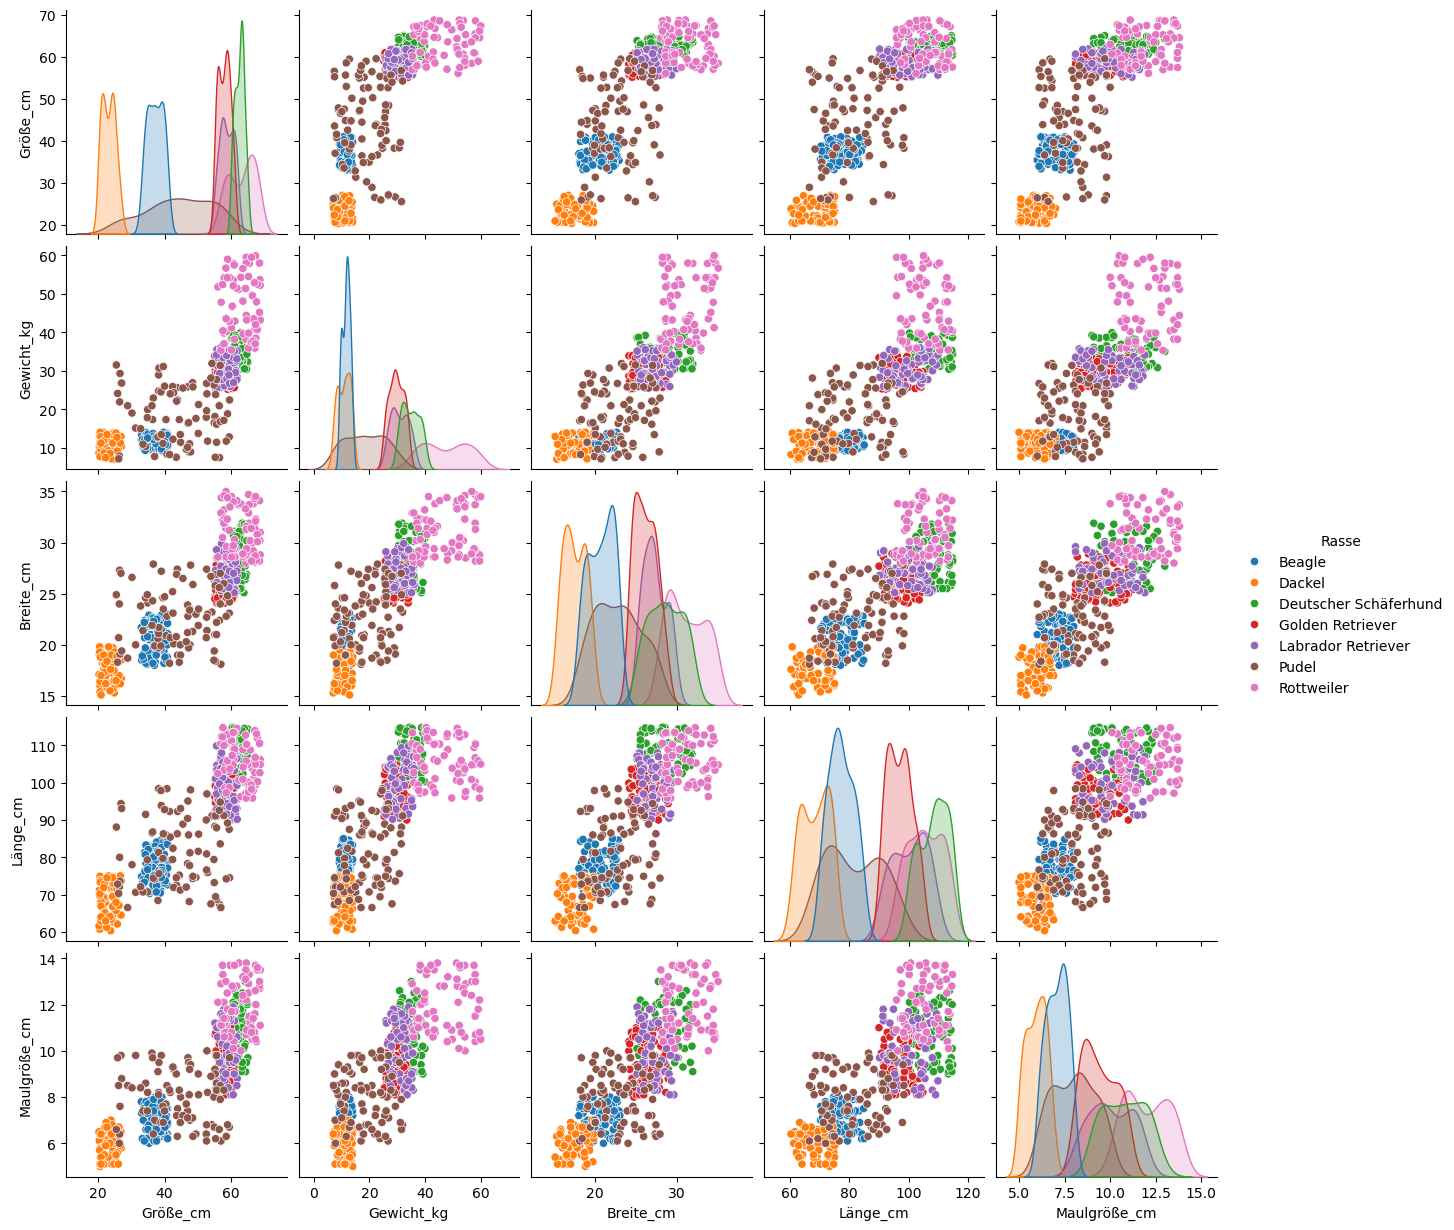

In [165]:
sns.pairplot(data = dog_data_test_train, hue = "Rasse")

In [233]:
# Bewertung: Der Algorithmus funktioniert gut. In der Regel liegt die Treffsicherheit (bei test_size = 0.2 und n=7) 
# bei ungefähr 0.8 oder höher. 

In [ ]:
# Realismus: ChatGPT hat oft nur die Durchschnittswerte von Google genommen, also meist realistisch (z.B. Größe Gewicht)
# Geschwindigkeit ist manchmal aber komisch